<a href="https://colab.research.google.com/github/varunkr24/Recommendation-System/blob/Python/Recommendation%2BSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recommendation System for Mobile phone**

**OBJECTIVE: Build a recommendation system using popularity based and collaborative filtering methods to recommend
mobile phones to a user which are most popular and personalised respectively.**

**DATA DESCRIPTION:**  
• author : name of the person who gave the rating  
• country : country the person who gave the rating belongs to  
• data : date of the rating  
• domain: website from which the rating was taken from  
• extract: rating content  
• language: language in which the rating was given  
• product: name of the product/mobile phone for which the rating was given  
• score: average rating for the phone  
• score_max: highest rating given for the phone  
• source: source from where the rating was taken  

**Import basic libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read Data**

In [ ]:
path1 = "/content/drive/MyDrive/AIML/Projects/Data Set/phone_user_review_file_1.csv"
path2 = "/content/drive/MyDrive/AIML/Projects/Data Set/phone_user_review_file_2.csv"
path3 = "/content/drive/MyDrive/AIML/Projects/Data Set/phone_user_review_file_3.csv"
path4 = "/content/drive/MyDrive/AIML/Projects/Data Set/phone_user_review_file_4.csv"
path5 = "/content/drive/MyDrive/AIML/Projects/Data Set/phone_user_review_file_5.csv"
path6 = "/content/drive/MyDrive/AIML/Projects/Data Set/phone_user_review_file_6.csv"

In [ ]:
df1 = pd.read_csv(path1,encoding='iso-8859-1')
df2 = pd.read_csv(path2,encoding='iso-8859-1')
df3 = pd.read_csv(path3,encoding='iso-8859-1')
df4 = pd.read_csv(path4,encoding='iso-8859-1')
df5 = pd.read_csv(path5,encoding='iso-8859-1')
df6 = pd.read_csv(path6,encoding='iso-8859-1')

**Check head of the first dataset**

In [ ]:
df1.head(2)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8


*Due to large size, files are given in parts, all file have same attributes*

In [ ]:
df1.shape

(374910, 11)

**Compile data**

In [ ]:
def df_append(a,b,c,d,e,f):
    a = a.append(b, ignore_index = True)
    a = a.append(c, ignore_index = True)
    a = a.append(d, ignore_index = True)
    a = a.append(e, ignore_index = True)
    a = a.append(f, ignore_index = True)
    return(a)

In [ ]:
df_phone = df_append(df1,df2,df3,df4,df5,df6)

In [ ]:
# Check first two rows of compiled data
df_phone.head(2)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8


In [ ]:
#Total records
df_phone.shape

(1415133, 11)

**Check all the records from each file is appended and none is skiped**

In [ ]:
len(df_phone) == len(df1)+len(df2)+len(df3)+len(df4)+len(df5)+len(df6)

True

**Unique ratings given by user**

In [ ]:
df_phone.score.unique()

array([10. ,  6. ,  9.2,  4. ,  8. ,  2. ,  9.6,  7.2,  6.8,  9. ,  8.3,
        8.8,  8.4,  5.3,  7. ,  6.4,  7.6,  nan,  5.2,  3.2,  4.4,  2.8,
        5.6,  3.6,  4.8,  1. ,  5. ,  3. ,  2.4,  9.3,  8.5,  9.5,  6.5,
        5.5,  9.8,  8.2,  8.6,  7.8,  9.4,  6.6,  6.2,  7.5,  9.9,  2.7,
        8.7,  6.7,  3.3,  7.7,  7.3,  9.7,  6.3,  7.4,  5.7,  4.7,  4.3,
        5.8,  4.2,  4.5,  2.2,  5.4,  7.9,  3.5,  4.6,  3.7,  2.5,  3.4,
        7.1,  8.1,  1.2,  1.4,  3.8,  9.1,  2.6,  1.6,  1.7,  1.5,  1.8,
        2.3,  6.1,  5.9,  1.3,  0.2,  0.4,  8.9,  6.9,  0.6,  4.9])

*Ratings are given in decimal format*  
*NaN values present in the rating column*

**Unique of max rating given user**

In [ ]:
df_phone.score_max.unique()

array([10., nan])

*Max rating for all users is 10*  
*NaN present*

**Rounding off Rating**

In [ ]:
df_phone.score = round(df_phone.score)

In [ ]:
df_phone.score.unique()

array([10.,  6.,  9.,  4.,  8.,  2.,  7.,  5., nan,  3.,  1.,  0.])

**Keeping only important attributes**

In [ ]:
df_phone2 = df_phone.iloc[:,lambda df_phone:[6,8,9,10]]
df_phone2.head(4)

,score,extract,author,product
0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,6.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,9.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)


**Check missing values**

In [ ]:
df_phone2.isnull().sum()

score      63489
extract    19361
author     63202
product        1
dtype: int64

**Droping records where user did not give rating or user is not known**

In [ ]:
df_phone3 = df_phone2.dropna()

**Check dupicates, remove if any**

In [ ]:
df_phone3.duplicated().any()

True

*Duplicates found*

In [ ]:
df_phone4 = df_phone3.drop_duplicates()

*Duplicates removed*

In [ ]:
len(df_phone3)-len(df_phone4)

16938

*16938 duplicate records removed*

**Dimension of dataframe**

In [ ]:
df_phone4.shape

(1258979, 4)

*Data has 1258979 records with four features*

**Keeping 1000000 records through random sample**

In [ ]:
df_phone5 = df_phone4.sample(n=1000000, random_state=612)
df_phone5.shape

(1000000, 4)

**Rating Distribution**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


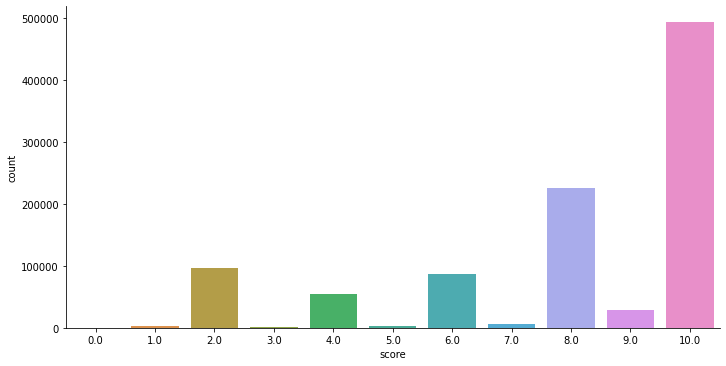

In [ ]:
sns.factorplot("score", data=df_phone5,aspect=2,kind='count')
plt.show();

*50% of the mobiles in the sample data are rated 10 by users*  
*Very few mobiles in the sample data are rated 1, 3, 5 or 9*


**Top 5 most rated mobile**

In [ ]:
#Most rated product
df_phone5.groupby('product')['score'].count().sort_values(ascending = False).head()

product
Lenovo Vibe K4 Note (White,16GB)       4135
Lenovo Vibe K4 Note (Black, 16GB)      3488
OnePlus 3 (Graphite, 64 GB)            3244
OnePlus 3 (Soft Gold, 64 GB)           2802
Lenovo Vibe K5 (Gold, VoLTE update)    1992
Name: score, dtype: int64

*Lenovo Vibe K4 Note (White,16GB) is the most rated mobile with 4135 users given rating to this mobile*

**Top 5 users with maximum number of reviews**

In [ ]:
#Users with most number of reviews
df_phone5.groupby('author')['extract'].count().sort_values(ascending=False).head()

author
Amazon Customer    60857
Cliente Amazon     15398
e-bit               6575
Client d'Amazon     6096
Amazon Kunde        3759
Name: extract, dtype: int64

*User called Amazon Customer has given maximim number of reviews*

**Products having more than 50 ratings and users who have given more than 50 ratings**

In [ ]:
df_phone6 = df_phone5.groupby(['product','author'])['score'].count().sort_values(ascending=False)

In [ ]:
df_phone7 = pd.DataFrame(df_phone6)
df_phone7.head()

,,score
product,author,
"Lenovo Vibe K4 Note (White,16GB)",Amazon Customer,2423
"Lenovo Vibe K4 Note (Black, 16GB)",Amazon Customer,2019
"OnePlus 3 (Graphite, 64 GB)",Amazon Customer,1438
"OnePlus 3 (Soft Gold, 64 GB)",Amazon Customer,1315
"Lenovo Vibe K5 (Gold, VoLTE update)",Amazon Customer,1222


**Now subset products having more than 50 ratings and users who have given more than 50 ratings** 

In [ ]:
df_phone8 = df_phone7[df_phone7['score']>50]
len(df_phone8)

235

*There are 235 such records in 1000000 randomly selected data*

#Popularity based recommendation model

**Select mobiles having highest mean ratings**

In [ ]:
popular_phone = pd.DataFrame(df_phone5[['product','score']].groupby('product')['score'].mean().sort_values(ascending=False))

In [ ]:
popular_phone.head(10)

,score
product,
æ©æç½æ C168i,10.0
Nokia Samsung G600 Black On T-Mobile PAYG Mobile Phone,10.0
Nokia Touch and Type Dark Metal 3G Unlocked GSM Touch Screen Phone with 5MP Camera / Wi-Fi (X3-02),10.0
Nokia Sony Ericsson W580i Pink On T-Mobile PAYG Mobile Phone,10.0
Nokia Sony Ericsson K770i Truffle Mobile Phone on Vodafone PAYG,10.0
Nokia Sony Ericsson K770i Pink On Vodafone PAYG Mobile Phone,10.0
Nokia Smartphone Nokia Lumia 830 Desbloqueado Windows 8.1 Tela 5 MemÃ³ria Interna 16GB Wi-Fi CÃ¢mera 10MP GPS Preto,10.0
"Nokia Smartphone Nokia Lumia 635, 4G, schermo 4,5"", 8 gb, Micro-SIM singola, SO Windows Phone 8.1, per tutti gli operatori",10.0
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8G GPS,10.0


*These are mobiles with highest rating*  
*To make it more meaningful to the user, one can add number of users who can given rating*

**Popular mobiles with user counts** 

In [ ]:
popular_phone['rating_count'] = pd.DataFrame(df_phone5.groupby('product')['score'].count())

In [ ]:
popular_phone.sort_values(by=['score', 'rating_count'], ascending=False).head()

,score,rating_count
product,,
Samsung Galaxy Note5,10.0,161
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 CÃ¢mera 10MP e Frontal 2MP MemÃ³ria Interna de 16GB GSM,10.0,151
Samsung Smartphone Dual Chip Samsung Galaxy SIII Duos Desbloqueado Claro Azul Android 4.1 3G/Wi-Fi CÃ¢mera 5MP,10.0,140
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi CÃ¢mera 5MP - Preto,10.0,134
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8G GPS,10.0,132


# Collaborative filtering Based Recommedation Model  
1. Collaborative filtering Based Recommendation Model using SVD  
2. Collaborative filtering Based Recommendation Model using KNNwithMeans  
   2.1 User Based  
   2.2 Item Based

**Let's first subset data where a user has rated/reviewed 500 or above times.**  
**This will ensure ratings to be more credible**

In [ ]:
count = pd.value_counts(df_phone5['author'])

In [ ]:
ratings = df_phone5[df_phone5['author'].isin(count[count >= 500].index)]

In [ ]:
ratings.shape

(107458, 4)

*107458 records are found where a user has rated/reviewed 500 or above times*

**Install Surpise library**

In [ ]:
!pip install surprise

     |████████████████████████████████| 11.8MB 5.3MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1618269 sha256=9906afdc6b7f4e12e291351500886088e5f58f00dd10ac0651dd3b47203384b2
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor

reader = Reader(rating_scale=(1, 10))

**Creating data with only required features i.e. user, mobile and rating**

In [ ]:
data = Dataset.load_from_df(ratings[['author', 'product', 'score']], reader)

In [ ]:
data.df.head(2)

,author,product,score
502195,Amazon Customer,"Motorola Moto G Turbo (Black, 16GB)",8.0
156430,Amazon Customer,"Mi Xiaomi Mi Max (Gold, 32GB)",10.0


**Split data into train and test using surprise library**

In [ ]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

In [ ]:
trainset.all_ratings()

<generator object Trainset.all_ratings at 0x7f69fcd76a40>

In [ ]:
# However the ids are the inner ids and not the raw ids
# raw ids can be obatined as follows
print(trainset.to_raw_uid(0))

Cliente Amazon


# 1. Collaborative filtering Based Recommendation Model using SVD

In [ ]:
from surprise import SVD, KNNWithMeans
from surprise import accuracy

In [ ]:
svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(trainset)

In [ ]:
testset[0]

('Amazon Customer',
 'LG Electronics G3 UK SIM-Free Smartphone - Gold (Android, 5.5-inch, 16GB)',
 10.0)

In [ ]:
test_pred_svd = svd_model.test(testset)

In [ ]:
# compute RMSE
accuracy.rmse(test_pred_svd)

RMSE: 3.0906


3.09058686484794

*RMSE score on test data is 3.09*

**Top 10 mobile recommedations to an user say Amazon Customer**

In [ ]:
pred_svd= pd.DataFrame(test_pred_svd)
pred_svd[pred_svd['uid'] == "Amazon Customer"][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(10)

,iid,r_ui,est
0,LG Electronics G3 UK SIM-Free Smartphone - Gol...,10.0,9.734809
14365,"Nokia Microsoft Lumia 640 Windows 8.1 Phone, 4...",10.0,7.092467
14339,Samsung Galaxy J7 SM-J700F (White) - Scheduled...,10.0,6.283063
14346,"Asus Zenfone Max ZC550KL-6A076IN (Black, 3GB, ...",10.0,8.039235
14351,Asus Zenfone 2 Laser 5.5 ZE550KL-1B122IN (White),10.0,6.330051
14360,Apple iPhone 6 16GB Factory Unlocked GSM 4G LT...,10.0,5.173482
14363,"Gionee F103 (White, 3GB RAM, 16GB)",10.0,9.580310
14364,Samsung Galaxy S6 SM-G920F Factory Unlocked Ce...,10.0,7.544439
14367,Samsung Galaxy S III / SGH-i747 16GB GSM Unloc...,10.0,8.912549
14336,Samsung GALAXY S7 EDGE G935FD DUAL SIM INTERNA...,10.0,7.783533


# 2. Collaborative filtering Based Recommendation Model using KNNWithMeans

**2.1 User Based**

In [ ]:
from surprise import KNNWithMeans
from surprise import accuracy

algo_u = KNNWithMeans(k=10, sim_options={ 'user_based': True})

algo_u.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
test_pred_u=algo_u.test(testset)
print(accuracy.rmse(test_pred_u))

RMSE: 3.0467
3.046748278047784


*RMSE score on test data is 3.04*

In [ ]:
uid = "Amazon Customer"  # raw user id (as in the ratings file). They are **strings**!
iid = "Mi Xiaomi Mi Max (Gold, 32GB)"  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items.
pred_uc = algo_u.predict(uid, iid, r_ui=0.0, verbose=True)

user: Amazon Customer item: Mi Xiaomi Mi Max (Gold, 32GB) r_ui = 0.00   est = 7.20   {'actual_k': 10, 'was_impossible': False}


**Top 10 user based recommendations of mobile to an user say Amazon Customer**

In [ ]:
pred_uc = pd.DataFrame(test_pred_u)
pred_uc[pred_uc['uid'] == "Amazon Customer"][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(10)

,iid,r_ui,est
0,LG Electronics G3 UK SIM-Free Smartphone - Gol...,10.0,9.991597
14365,"Nokia Microsoft Lumia 640 Windows 8.1 Phone, 4...",10.0,8.400000
14339,Samsung Galaxy J7 SM-J700F (White) - Scheduled...,10.0,5.600000
14346,"Asus Zenfone Max ZC550KL-6A076IN (Black, 3GB, ...",10.0,7.200000
14351,Asus Zenfone 2 Laser 5.5 ZE550KL-1B122IN (White),10.0,6.000000
14360,Apple iPhone 6 16GB Factory Unlocked GSM 4G LT...,10.0,6.400000
14363,"Gionee F103 (White, 3GB RAM, 16GB)",10.0,10.000000
14364,Samsung Galaxy S6 SM-G920F Factory Unlocked Ce...,10.0,7.544439
14367,Samsung Galaxy S III / SGH-i747 16GB GSM Unloc...,10.0,8.666667
14336,Samsung GALAXY S7 EDGE G935FD DUAL SIM INTERNA...,10.0,7.000000


**2.2 Item Based**

In [ ]:
algo_i = KNNWithMeans(k=10, sim_options={ 'user_based': False})

algo_i.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
test_pred_i=algo_i.test(testset)
print(accuracy.rmse(test_pred_i))

RMSE: 3.0548
3.0548206216965754


RMSE score on test data is 3.05

In [ ]:
uid = "Amazon Customer"  # raw user id (as in the ratings file). They are **strings**!
iid = "Mi Xiaomi Mi Max (Gold, 32GB)"  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items.
pred_ic = algo_i.predict(uid, iid, r_ui=0.0, verbose=True)

user: Amazon Customer item: Mi Xiaomi Mi Max (Gold, 32GB) r_ui = 0.00   est = 7.20   {'actual_k': 10, 'was_impossible': False}


**Top 10 item based recommendations of mobile to an user say Amazon Customer**

In [ ]:
pred_ic = pd.DataFrame(test_pred_i)
pred_ic[pred_ic['uid'] == "Amazon Customer"][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(10)

,iid,r_ui,est
0,LG Electronics G3 UK SIM-Free Smartphone - Gol...,10.0,10.000000
14365,"Nokia Microsoft Lumia 640 Windows 8.1 Phone, 4...",10.0,8.400000
14339,Samsung Galaxy J7 SM-J700F (White) - Scheduled...,10.0,5.600000
14346,"Asus Zenfone Max ZC550KL-6A076IN (Black, 3GB, ...",10.0,7.200000
14351,Asus Zenfone 2 Laser 5.5 ZE550KL-1B122IN (White),10.0,6.000000
14360,Apple iPhone 6 16GB Factory Unlocked GSM 4G LT...,10.0,6.400000
14363,"Gionee F103 (White, 3GB RAM, 16GB)",10.0,10.000000
14364,Samsung Galaxy S6 SM-G920F Factory Unlocked Ce...,10.0,7.544439
14367,Samsung Galaxy S III / SGH-i747 16GB GSM Unloc...,10.0,8.666667
14336,Samsung GALAXY S7 EDGE G935FD DUAL SIM INTERNA...,10.0,7.000000


#K-fold cross validation

**Let's apply K-fold cross validation on Item based collaborative filtering**

In [ ]:
from surprise.model_selection import KFold
kf = KFold(n_splits=5)

for trainset, testset in kf.split(data):
    #algo_i = KNNWithMeans(k=10, sim_options={ 'user_based': False}) # already ran above
    # train and test algorithm.
    algo_i.fit(trainset)
    predictions = algo_i.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.9986
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.0451
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.0530
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.0210
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.0275


In [ ]:
mean = (2.9986+3.0451+3.0530+3.0210+3.0275)/5
print(mean)

3.0290399999999997


*Mean RMSE of K-fold cross validation of Item based collaborative filtering  is 3.0290.*  
*Best and worst model among the five gave RMSE score of 2.99 and 3.05.*  
*K-fold improved the score slightly with very small deviation in scores which give more confidence in production environment.*

#Recommendations:  
**Popularity based recommendation should be used when no purchasing/product history of an user is available because some recommendation is better than no recommendation.**  
**As we got to know about user's likes or dislikes about a product, Collaborative filtering based recommendation should be used, it could be mix of user based and item based recommendation.**  
**In order to improve recommendations further, Apriori based recommendation i.e. Market Basket Analysis can be used.**

#Thank-you